### In this nb we will use the improvements made in Exploratory3 to analyse more scenarios.

In [1]:
from utils import *
env()

--------- Dependencies ---------
python: 3.8.10 | packaged by conda-forge | (default, May 11 2021, 06:25:23) [MSC v.1916 64 bit (AMD64)]
numpy: 1.21.0
pandas: 1.2.4
matplotlib: 3.4.2
statsmodels: 0.13.0


## General Models

### EPU

In [2]:
wti = load('data/WTI.csv').pct_change().dropna()
spot = clean_series('spot', wti)
c1 = clean_series('contract_1', wti)
c3 = clean_series('contract_3', wti)

In [3]:
epu = load('data/EPUGlobal.csv')
epu_shock = calc_shock('GEPU_current', epu)

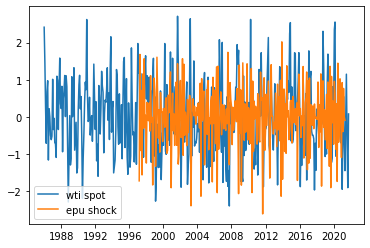

In [4]:
plt.plot(spot, label='wti spot')
plt.plot(epu_shock, label='epu shock')
plt.legend()

In [5]:
model1 = ardl('spot', 'GEPU_current', spot.join(epu_shock))
model2 = ardl('contract_1', 'GEPU_current', c1.join(epu_shock))
model3 = ardl('contract_3', 'GEPU_current', c3.join(epu_shock))

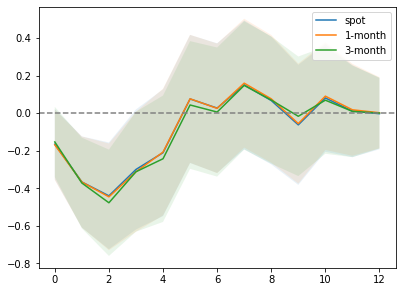

In [6]:
draw((model1, model2, model3),
    labels=('spot', '1-month', '3-month')
    )

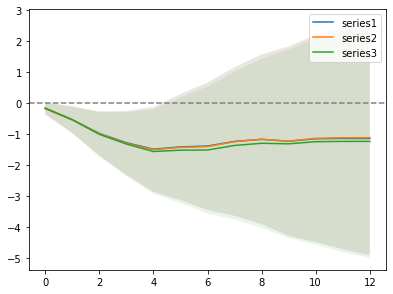

In [7]:
draw((model1, model2, model3), cumulative=True)

In [8]:
gpr = load('data/GPRGlobal.csv')
gpr_shock = calc_shock('GPRI', gpr)

### GPR

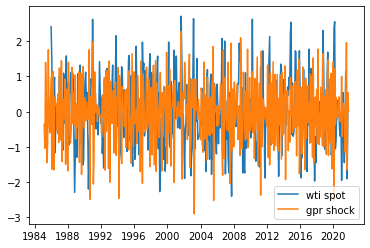

In [9]:
plt.plot(spot, label='wti spot')
plt.plot(gpr_shock, label='gpr shock')
plt.legend()

In [10]:
model4 = ardl('spot', 'GPRI', spot.join(gpr_shock))
model5 = ardl('contract_1', 'GPRI', c1.join(gpr_shock))
model6 = ardl('contract_3', 'GPRI', c3.join(gpr_shock))

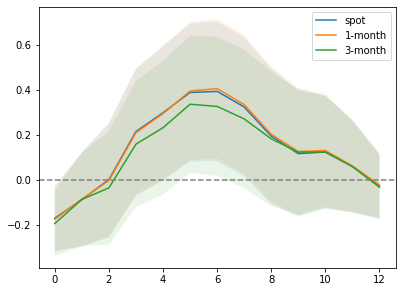

In [11]:
draw((model4, model5, model6),
     labels=('spot', '1-month', '3-month')
    )

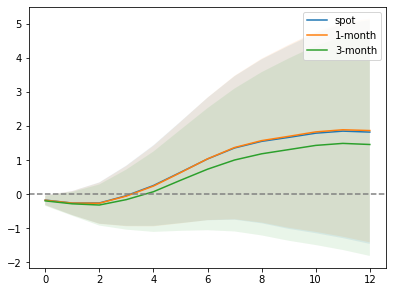

In [12]:
draw((model4, model5, model6),
     labels=('spot', '1-month', '3-month'),
     cumulative=True)

## Time Slicing

### GPR Pre & Post Iraq

In [13]:
model7 = ardl('spot', 'GPRI', spot.join(gpr_shock)[:'2005-01-01'])
model8 = ardl('spot', 'GPRI', spot.join(gpr_shock)['2005-01-01':])

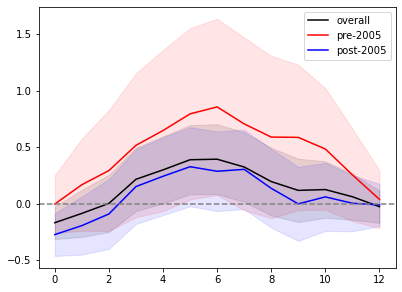

In [14]:
draw((model4, model7, model8), 
     labels=('overall', 'pre-2005', 'post-2005'),
     colors=('black', 'red', 'blue')
    )

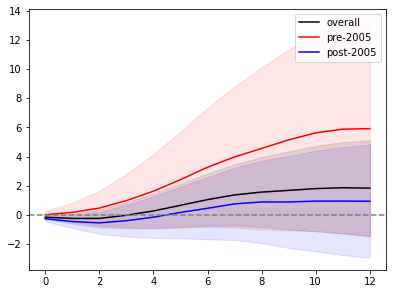

In [15]:
draw((model4, model7, model8), 
     labels=('overall', 'pre-2005', 'post-2005'),
     colors=('black', 'red', 'blue'),
     cumulative=True
    )

### EPU Pre & Post GFC

In [16]:
model9 = ardl('spot', 'GEPU_current', spot.join(epu_shock)[:'2010-01-01'])
model10 = ardl('spot', 'GEPU_current', spot.join(epu_shock)['2010-01-01':])

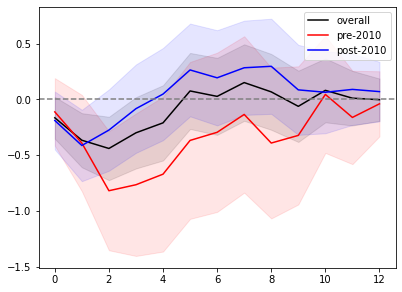

In [17]:
draw((model1, model9, model10), 
     labels=('overall', 'pre-2010', 'post-2010'),
     colors=('black', 'red', 'blue')
    )

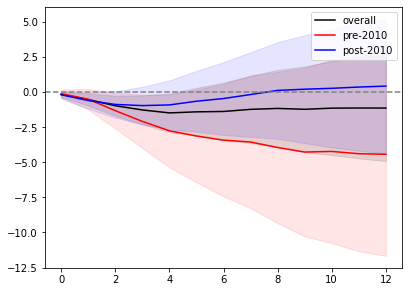

In [18]:
draw((model1, model9, model10), 
     labels=('overall', 'pre-2010', 'post-2010'),
     colors=('black', 'red', 'blue'),
     cumulative=True
    )

The relationship between crude and pre-2005 geopolitical risk (i.e. US interventionalism) is quite expected because the Middle East was the world's largest supplier of crude before the advent of the shale oil boom in the US. However, it's unexpected to see the relationship between crude and economic policy uncertainty pre and post GFC. I wonder if the result will be robust to the removal of the GFC period.

In [19]:
model11 = ardl('spot', 'GEPU_current', spot.join(epu_shock)[:'2007-01-01'])

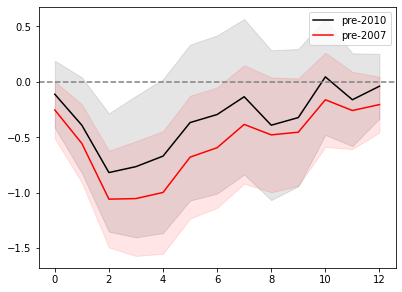

In [20]:
draw((model9, model11), 
     labels=('pre-2010', 'pre-2007'),
     colors=('black', 'red')
    )

While I was expecting the GFC to be the main contributor to the difference in response pre and post GFC, the graph actually suggests that during the GFC crude responded less to EPU shocks than before. This is remarkable especially given that crude prices fell off a cliff during the GFC. Since we can't get a decent sample size for the GFC period, we can sanity check with a comparison to difference in GPR shocks if we exclude the Iraq invasion.

In [21]:
model12 = ardl('spot', 'GPRI', spot.join(gpr_shock)[:'2003-01-01'])

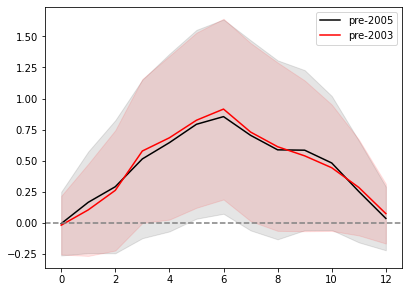

In [22]:
draw((model7, model12), 
     labels=('pre-2005', 'pre-2003'),
     colors=('black', 'red')
    )

Here the difference is negligible compared to EPU, suggesting that crude movements during the Iraq invasion was consistent with previous reactions to GPR shocks. I wonder if the same results hold using the VIX as a general indicator for market uncertainty.

<AxesSubplot:xlabel='date'>

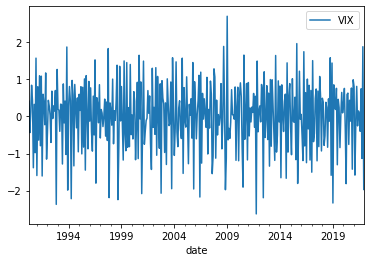

In [23]:
vix = load('data/VIX.csv')
vix_shock = calc_shock('VIX', vix)
vix_shock.plot()

In [24]:
model13 = ardl('spot', 'VIX', spot.join(vix_shock)[:'2010-01-01'])
model14 = ardl('spot', 'VIX', spot.join(vix_shock)[:'2007-01-01'])

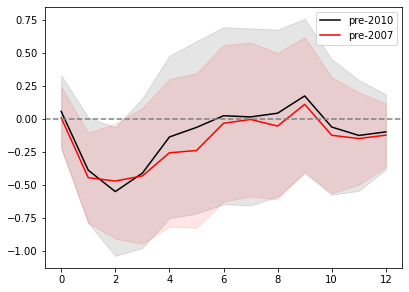

In [25]:
draw((model13, model14), 
     labels=('pre-2010', 'pre-2007'),
     colors=('black', 'red')
    )

Here the difference disappears, suggesting that it was probably an anomaly of index construction. However, I wonder what the general relationship between crude and the VIX is pre and post GFC.

### VIX

In [26]:
model15 = ardl('spot', 'VIX', spot.join(vix_shock)['2010-01-01':])
model16 = ardl('spot', 'VIX', spot.join(vix_shock))

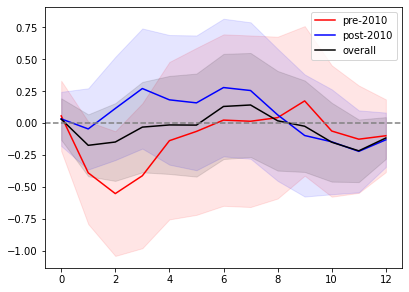

In [27]:
draw((model13, model15, model16), 
     labels=('pre-2010', 'post-2010', 'overall'),
     colors=('red', 'blue', 'black')
    )

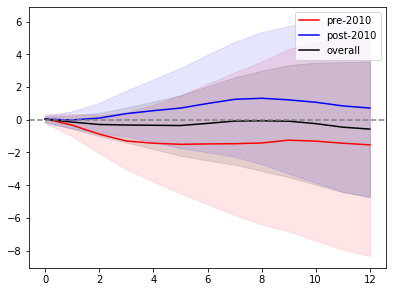

In [28]:
draw((model13, model15, model16), 
     labels=('pre-2010', 'post-2010', 'overall'),
     colors=('red', 'blue', 'black'),
     cumulative=True
    )

It appears that crude's relationship to the VIX inverted around the GFC, similar to with EPU. I wonder how that dynamic changed within the crude futures market, especially for longer term contracts used for hedging uncertainties.

In [29]:
model17 = ardl('contract_3', 'VIX', c3.join(vix_shock)[:'2010-01-01'])
model18 = ardl('contract_3', 'VIX', c3.join(vix_shock)['2010-01-01':])
model19 = ardl('contract_3', 'VIX', c3.join(vix_shock))

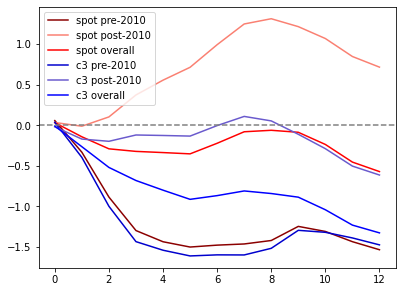

In [30]:
draw((model13, model15, model16, model17, model18, model19), 
     labels=('spot pre-2010', 'spot post-2010', 'spot overall', 'c3 pre-2010', 'c3 post-2010', 'c3 overall'),
     colors=('darkred', 'salmon', 'red', 'mediumblue', 'slateblue', 'blue'),
     conf_int=False,
     cumulative=True
    )

The decoupling in response between pricing for crude spot and 3-month futures is really interesting. It might not have anything to do with the GFC at all, but rather the increased financialization of the crude market - people might respond to stock market uncertainty by shifting some of their portfolio allocation to crude & other commodities. It'll be interesting to explore whether such a decoupling exists for front-month futures as well, which I've read is what most pundits use to buy crude.

In [31]:
model20 = ardl('contract_1', 'VIX', c1.join(vix_shock)[:'2010-01-01'])
model21 = ardl('contract_1', 'VIX', c1.join(vix_shock)['2010-01-01':])
model22 = ardl('contract_1', 'VIX', c1.join(vix_shock))

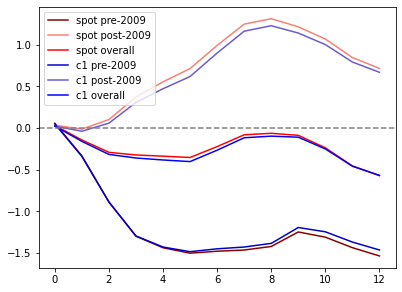

In [32]:
draw((model13, model15, model16, model20, model21, model22), 
     labels=('spot pre-2009', 'spot post-2009', 'spot overall', 'c1 pre-2009', 'c1 post-2009', 'c1 overall'),
     colors=('darkred', 'salmon', 'red', 'mediumblue', 'slateblue', 'blue'),
     conf_int=False,
     cumulative=True
    )

Perfectly aligned! Now you really must wonder whether front-month futures is driving spot or vice versa. Since spot is only for physically settled transactions, I'll wager that the inverse in relationship could have come about as a result of more portfolio managers diversifying into commodities whenever a shock in the stock market occurs. 

If this theory is correct, we should see less decoupling between 3-month futures and spot prices post-GFC with the EPU, since the EPU is less concerned with the stock market.

In [33]:
model23 = ardl('contract_3', 'GEPU_current', c3.join(epu_shock)[:'2010-01-01'])
model24 = ardl('contract_3', 'GEPU_current', c3.join(epu_shock)['2010-01-01':])
model25 = ardl('contract_3', 'GEPU_current', c3.join(epu_shock))

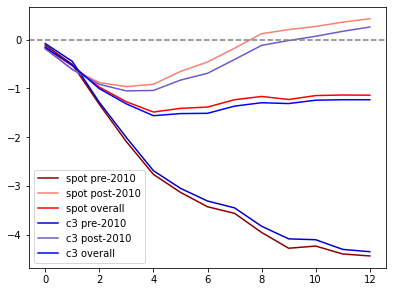

In [34]:
draw((model9, model10, model1, model23, model24, model25), 
     labels=('spot pre-2010', 'spot post-2010', 'spot overall', 'c3 pre-2010', 'c3 post-2010', 'c3 overall'),
     colors=('darkred', 'salmon', 'red', 'mediumblue', 'slateblue', 'blue'),
     conf_int=False,
     cumulative=True
    )

Wow, I wonder how significant the result is.

In [35]:
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   spot   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     1.944
Date:                Thu, 30 Dec 2021   Prob (F-statistic):             0.0285
Time:                        17:16:05   Log-Likelihood:                -170.57
No. Observations:                 130   AIC:                             371.1
Df Residuals:                     115   BIC:                             414.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0696      0.084      0.826      0.410      -0.097       0.237
spot-lag1      0.1858      0.092      2.025      0.045       0.004       0.368
VIX-lag0       0.0565      0.139      0.407      0.685      -0.219       0.332
VIX-lag1      -0.3896      0.203     -1.923      0.057      -0.791       0.012
VIX-lag2      -0.5523      0.247     -2.240      0.027      -1.041      -0.064
VIX-lag3      -0.4126      0.287     -1.440      0.153      -0.980       0.155
VIX-lag4      -0.1378      0.311     -0.443      0.659      -0.754       0.479
VIX-lag5      -0.0652      0.330     -0.198      0.844      -0.719       0.589
VIX-lag6       0.0234      0.339      0.069      0.945      -0.648       0.695
VIX-lag7       0.0144      0.339      0.042      0.966      -0.657       0.686
VIX-lag8       0.0427      0.320      0.133      0.894      -0.591       0.677
VIX-lag9       0.1738      0.296      0.588      0.558      -0.412       0.760
VIX-lag10     -0.0622      0.260     -0.240      0.811      -0.577       0.452
VIX-lag11     -0.1261      0.212     -0.594      0.554      -0.547       0.294
VIX-lag12     -0.0992      0.144     -0.690      0.492      -0.384       0.186
==============================================================================
Omnibus:                        1.009   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.604   Jarque-Bera (JB):                1.117
Skew:                           0.185   Prob(JB):                        0.572
Kurtosis:                       2.737   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   spot   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1.748
Date:                Thu, 30 Dec 2021   Prob (F-statistic):             0.0484
Time:                        17:16:05   Log-Likelihood:                -310.57
No. Observations:                 226   AIC:                             651.1
Df Residuals:                     211   BIC:                             702.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0036      0.066     -0.054      0.957      -0.134       0.127
spot-lag1      0.1872      0.067      2.793      0.006       0.055       0.319
VIX-lag0       0.0330      0.107      0.307      0.759      -0.179       0.245
VIX-lag1      -0.0457      0.161     -0.283      0.778      -0.364       0.273
VIX-lag2       0.1146      0.205      0.559      0.577      -0.290       0.519
VIX-lag3       0.2707      0.239      1.134      0.258      -0.200       0.741
VIX-lag4       0.1821      0.258      0.707      0.480      -0.326       0.690
VIX-lag5       0.1585      0.268      0.592      0.555      -0.369       0.686
VIX-lag6       0.2784      0.273      1.018      0.310      -0.261       0.817
VIX-lag7       0.2551      0.271      0.941      0.348      -0.279       0.789
VIX-lag8       0.0647      0.262      0.246      0.806      -0.453       0.582
VIX-lag9      -0.0973      0.243     -0.401      0.689      -0.576       0.381
VIX-lag10     -0.1465      0.208     -0.702      0.483      -0.557       0.265
VIX-lag11     -0.2216      0.163     -1.360      0.175      -0.543       0.100
VIX-lag12     -0.1309      0.108     -1.210      0.228      -0.344       0.082
==============================================================================
Omnibus:                        3.641   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.162   Jarque-Bera (JB):                3.222
Skew:                           0.209   Prob(JB):                        0.200
Kurtosis:                       2.592   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Overall VIX doesn't have a significant effect post-2008 (perhaps as a result of increased noise - i.e. not all portfolio managers choose to diversify into crude after VIX shocks), but the magnitude of the response is not to be underestimated.

Let's see if the result is robust in recent times.

In [37]:
model26 = ardl('spot', 'VIX', spot.join(vix_shock)['2015-01-01':])

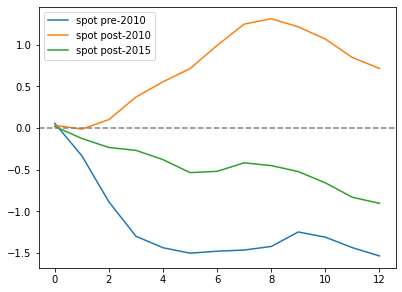

In [38]:
draw((model13, model15, model26),
     labels=('spot pre-2010', 'spot post-2010', 'spot post-2015'),
     conf_int=False,
     cumulative=True
    )

In [39]:
model27 = ardl('spot', 'VIX', spot.join(vix_shock)['2012-01-01':])

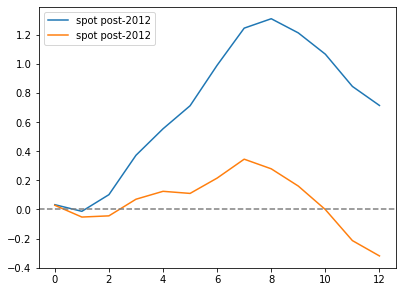

In [40]:
draw((model15, model27),
     labels=('spot post-2012', 'spot post-2012'),
     conf_int=False,
     cumulative=True
    )

Rather than the GFC skewing results as I originally thought, it appears that it's the post-GFC recovery that skewed results. It makes sense that oil prices would only be viewed as a hedge to stock volatility in the wake of the GFC, especially given the context of the broader commodities rally.